# PRODIGY TASK 04

## PROBLEM STATEMENT-
### Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

### IMPORTING NECESSARIES LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the Dataset

In [4]:
cols= ['ID', 'Topic', 'Sentiment', 'Text']
train= pd.read_csv('https://raw.githubusercontent.com/aishwaryadatascience/PRODIGY-TASK-04/main/socical_media_sentiments', names= cols)

In [5]:
train.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
train.shape

(74682, 4)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
train.describe(include= object)

,Topic,Sentiment,Text
count,74682,74682,73996
unique,32,4,69491
top,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,2400,22542,172


In [9]:
train['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

### CHECKING FOR NULL VALUES

In [10]:
train.isnull().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [11]:
train.dropna(inplace= True)

In [12]:
train.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

### CHECKING FOR DUPLICATE VALUES

In [13]:
train.duplicated().sum()

2340

In [15]:
train.drop_duplicates(inplace= True)

In [16]:
train.duplicated().sum()

0

## VISUALIZATION

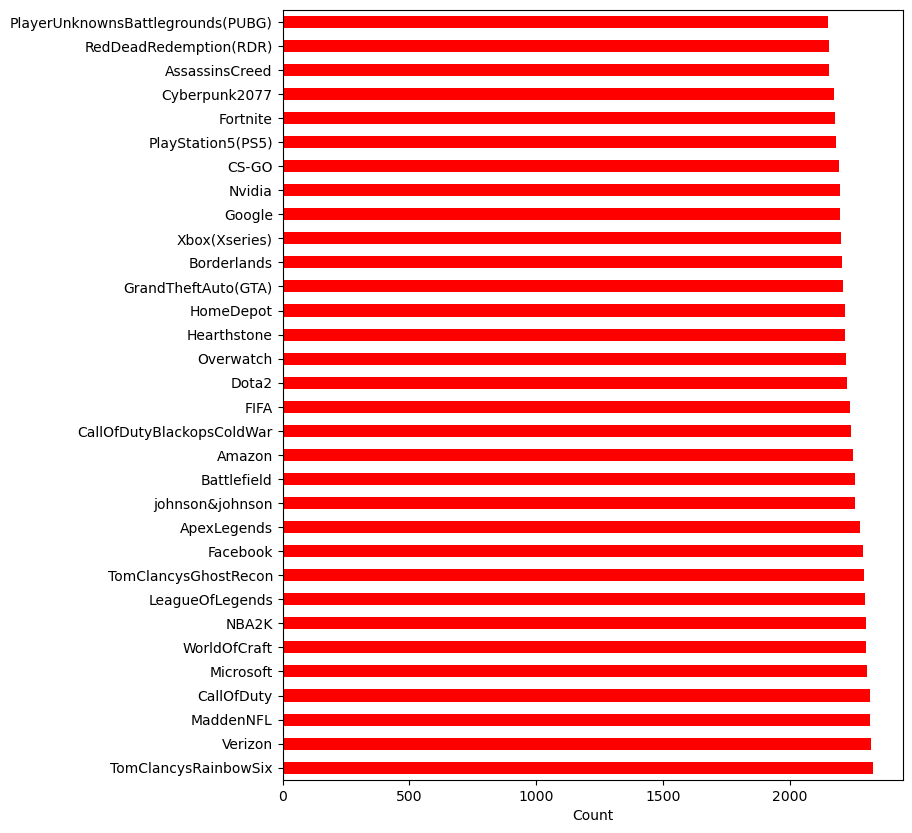

In [17]:
plt.figure(figsize= (8,10))
train['Topic'].value_counts().plot(kind= 'barh', color= 'r')
plt.xlabel("Count")
plt.show()

### SENTIMENT DISTRIBUTION

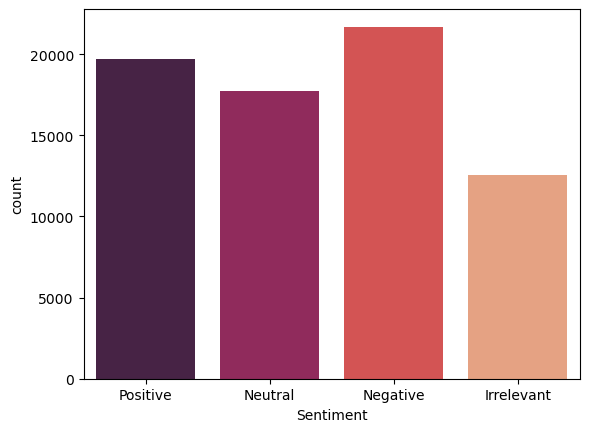

In [20]:
sns.countplot(x= 'Sentiment', data= train, palette= 'rocket')
plt.show()

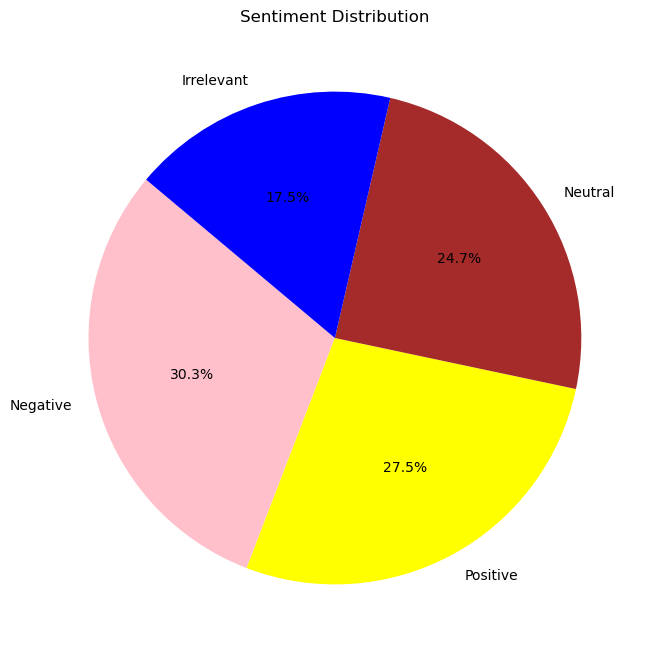

In [22]:
# Calculating the counts 
sentiment_counts= train['Sentiment'].value_counts()

# Creating piechart
plt.figure(figsize= (8,8))
plt.pie(sentiment_counts, labels= sentiment_counts.index, autopct= "%1.1f%%", startangle= 140, colors= ['pink', 'yellow', 'brown', 'blue', 'purple'])
plt.title('Sentiment Distribution')
plt.show()

In [23]:
train

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


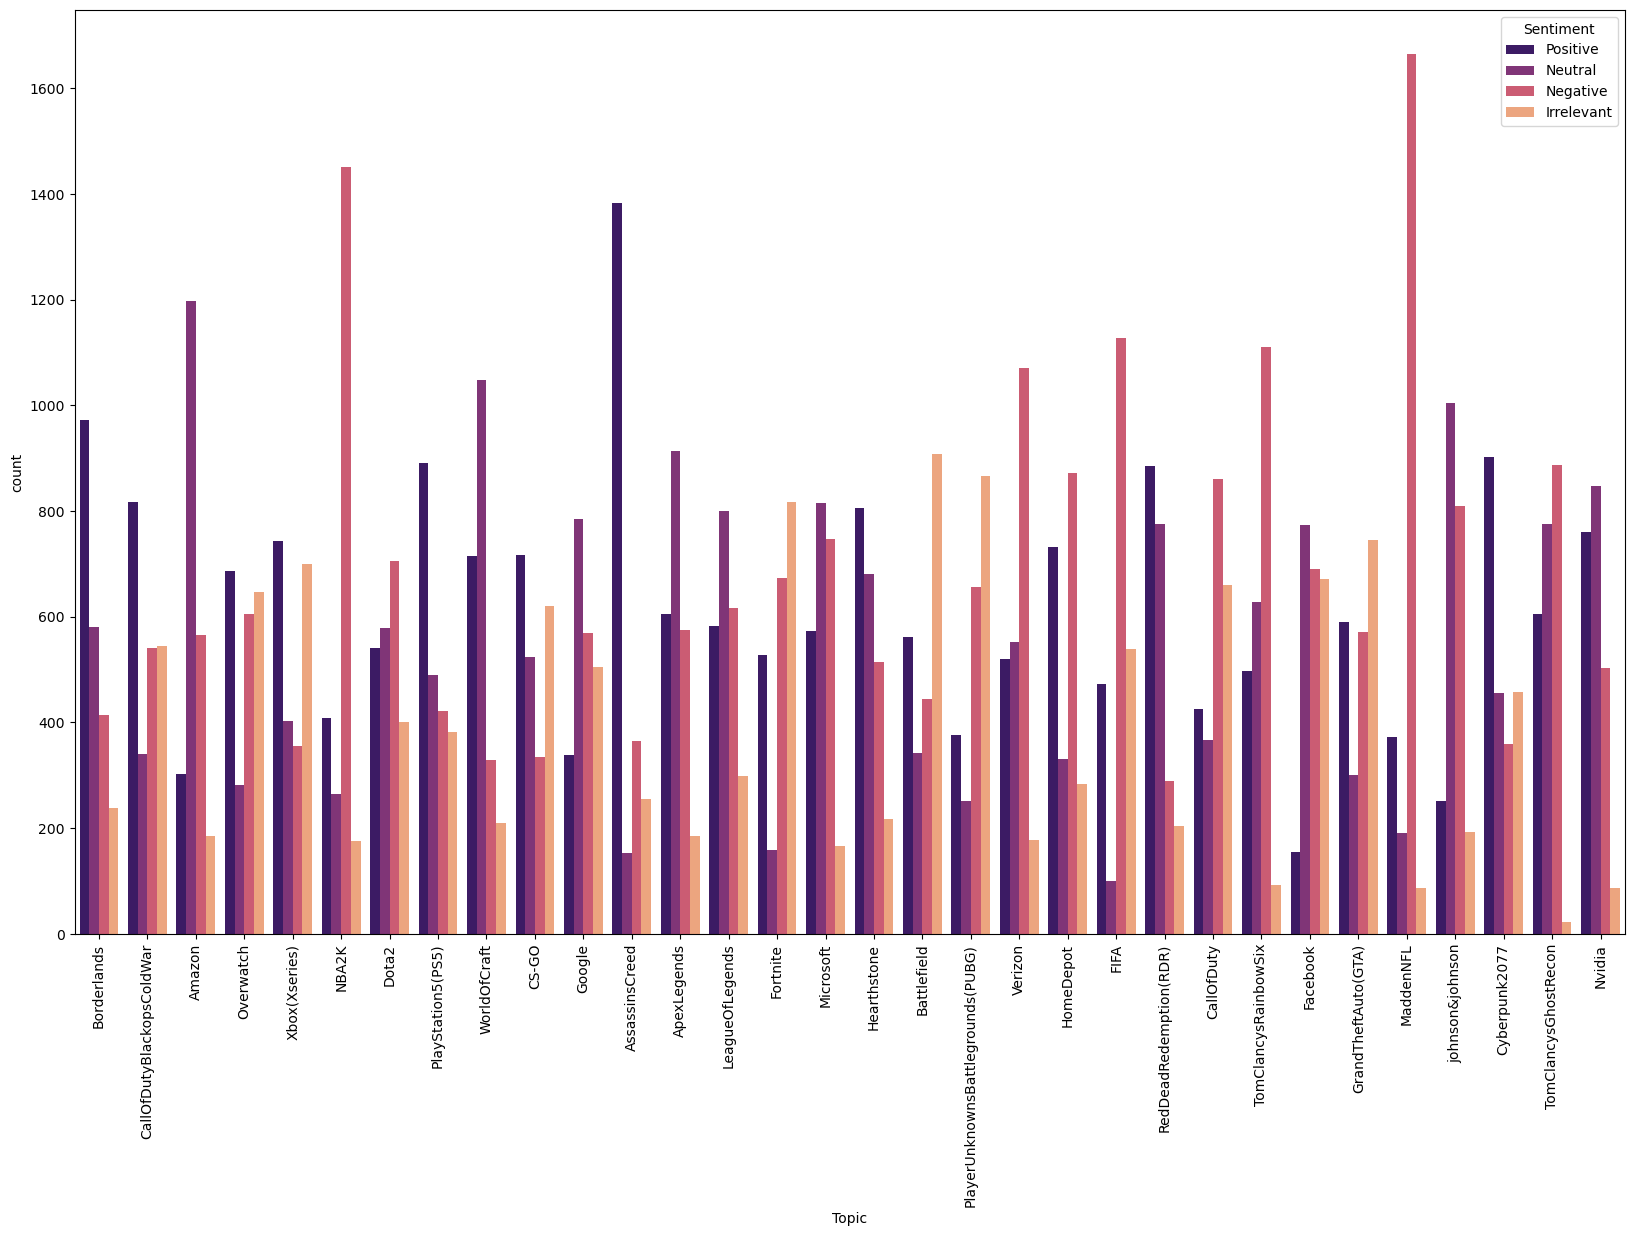

In [25]:
# Sentiment Distribution

plt.figure(figsize= (20,12))
sns.countplot(x= 'Topic', data= train, palette= 'magma', hue= 'Sentiment')
plt.xticks(rotation= 90)
plt.show()

In [26]:
topic_sentiment= train.groupby(["Topic", "Sentiment"]).size().reset_index(name= 'Count')

# Selecting top 5 Topics
topic_counts= train['Topic'].value_counts().nlargest(5).index
top_topics= topic_sentiment[topic_sentiment['Topic'].isin(topic_counts)]

### NEGATIVE SENTIMENT

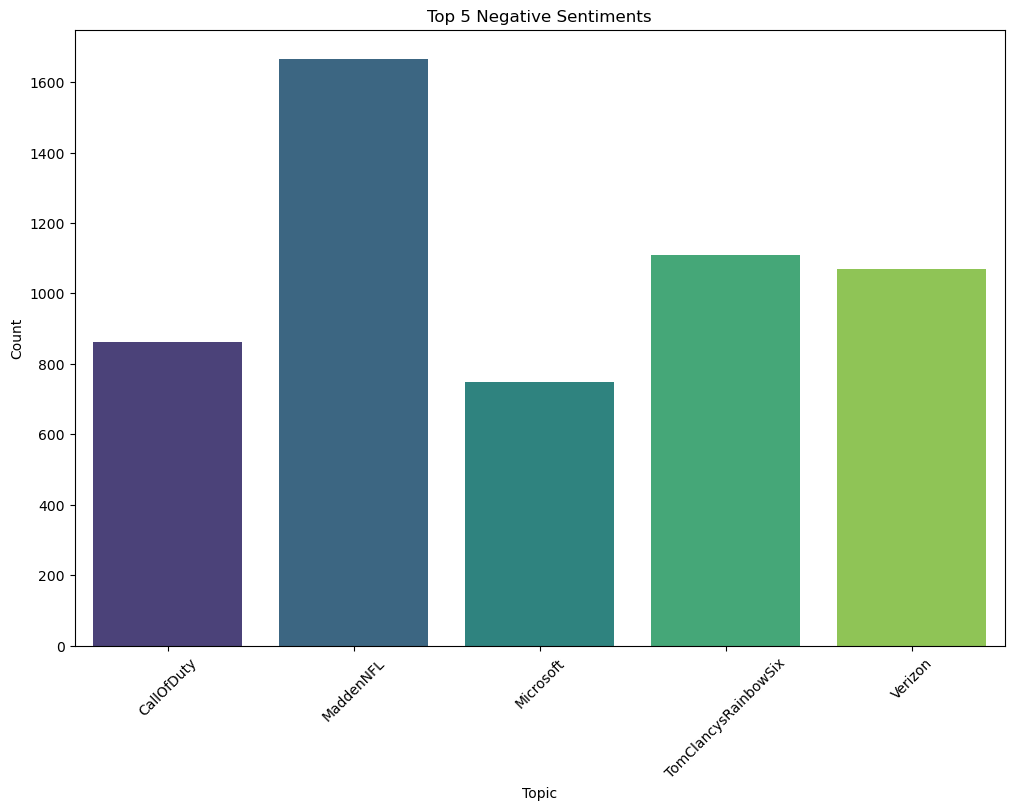

In [29]:
plt.figure(figsize= (12,8))
sns.barplot(data= top_topics[top_topics['Sentiment'] == 'Negative'], x= 'Topic', y= 'Count', palette= 'viridis')
plt.title('Top 5 Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

### POSITIVE SENTIMENT

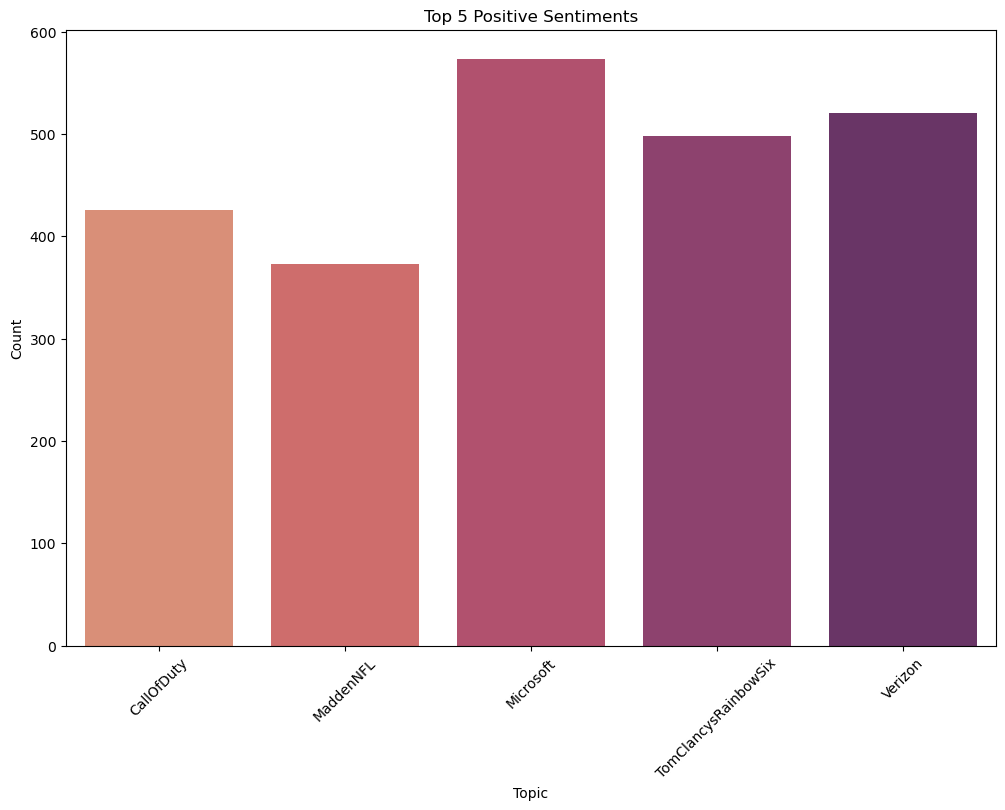

In [30]:
plt.figure(figsize= (12,8))
sns.barplot(data= top_topics[top_topics['Sentiment'] == 'Positive'], x= 'Topic', y= 'Count', palette= 'flare')
plt.title('Top 5 Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

### NEUTRAL SENTIMENT

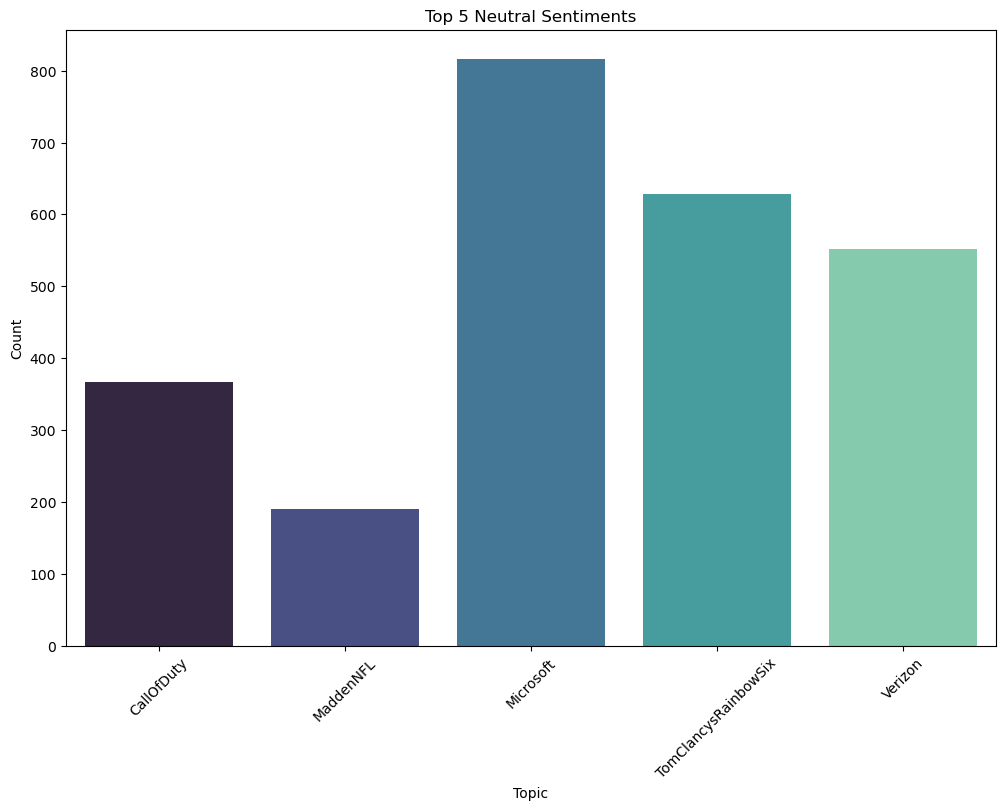

In [32]:
plt.figure(figsize= (12,8))
sns.barplot(data= top_topics[top_topics['Sentiment'] == 'Neutral'], x= 'Topic', y= 'Count', palette= 'mako')
plt.title('Top 5 Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

### IRRELEVANT SENTIMENT

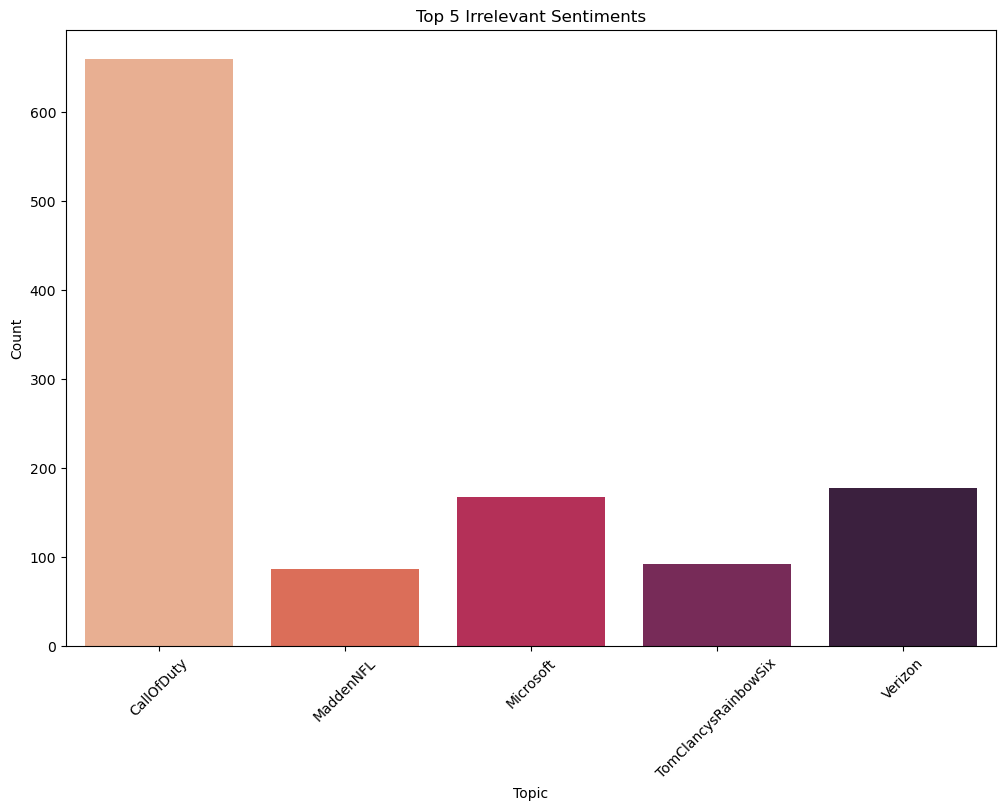

In [33]:
plt.figure(figsize= (12,8))
sns.barplot(data= top_topics[top_topics['Sentiment'] == 'Irrelevant'], x= 'Topic', y= 'Count', palette= 'rocket_r')
plt.title('Top 5 Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

### SENTIMENT DISTRIBUTION IN GOOGLE

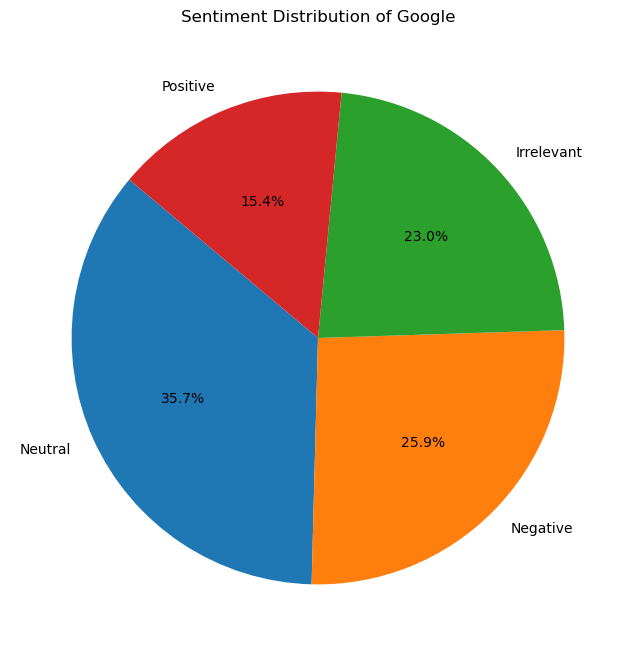

In [34]:
g_data= train[train['Topic'] == 'Google']

# Counting the occurance of each sentiments
sentiment_counts= g_data['Sentiment'].value_counts()

# Piechart
plt.figure(figsize= (8,8))
plt.pie(sentiment_counts, labels= sentiment_counts.index, autopct= '%1.1f%%', startangle= 140)
plt.title('Sentiment Distribution of Google')
plt.show()

### SENTIMENT DISTRIBUTION IN MICROSOFT

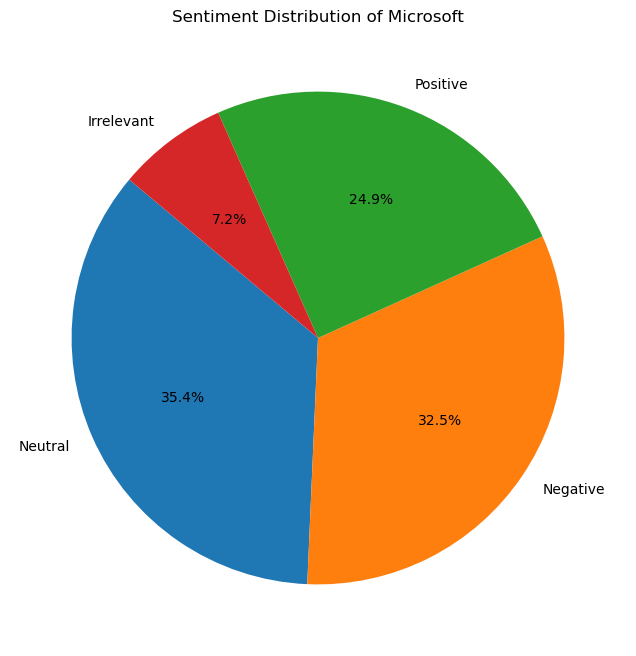

In [35]:
ms_data= train[train['Topic'] == 'Microsoft']

# Counting the occurance of each sentiments
sentiment_counts= ms_data['Sentiment'].value_counts()

# Piechart
plt.figure(figsize= (8,8))
plt.pie(sentiment_counts, labels= sentiment_counts.index, autopct= '%1.1f%%', startangle= 140)
plt.title('Sentiment Distribution of Microsoft')
plt.show()

In [36]:
train['msg_len']= train['Text'].apply(len)
train

,ID,Topic,Sentiment,Text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159


### LENGTH DISTRIBUTION FOR TRAINING DATA

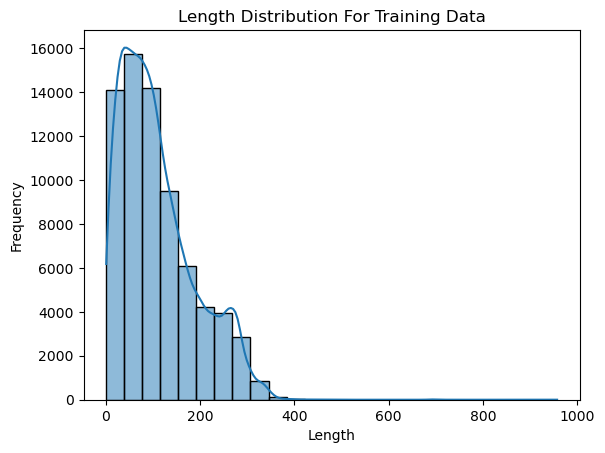

In [38]:
sns.histplot(train[ 'msg_len'], bins= 25, kde= True)
plt.title('Length Distribution For Training Data')
plt.ylabel('Frequency')
plt.xlabel('Length')
plt.show()

### LENGTH DISTRIBUTION BY SENTIMENT IN TRAINING DATA

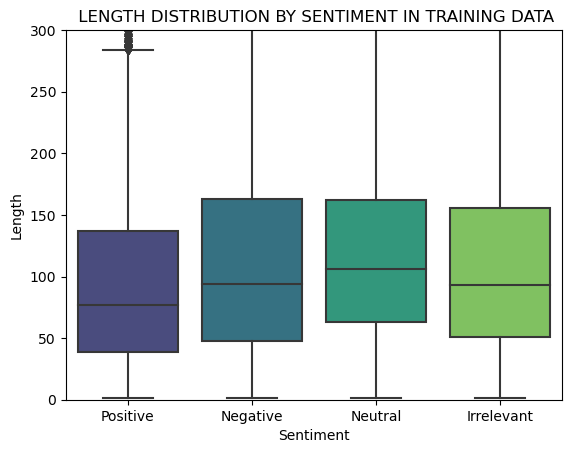

In [39]:
sns.boxplot(data= train, x= train['Sentiment'], y= 'msg_len', palette= 'viridis', order= ['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title(' LENGTH DISTRIBUTION BY SENTIMENT IN TRAINING DATA')
plt.ylabel('Length')
plt.xlabel('Sentiment')
plt.ylim(0,300)
plt.show()

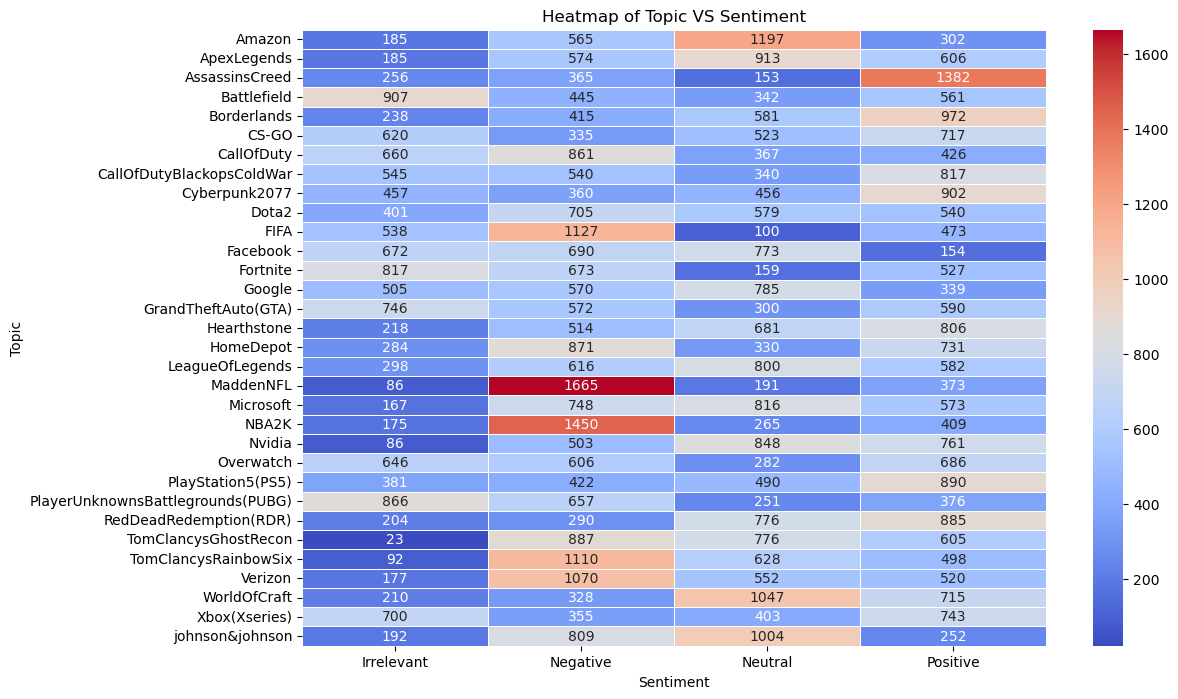

In [41]:
# Creating the Crosstab
crosstab= pd.crosstab(index= train['Topic'], columns= train['Sentiment'])

# Heatmap
plt.figure(figsize= (12,8))
sns.heatmap(crosstab, cmap= 'coolwarm', annot= True, fmt= 'd', linewidth= 0.5)
plt.title('Heatmap of Topic VS Sentiment')
plt.ylabel('Topic')
plt.xlabel('Sentiment')
plt.show()

In [ ]:
# Create the crosstab
crosstab = pd.crosstab(index=train['Topic'], columns=train['Sentiment'])

# Plot the heatmap
plt.figure(figsize=(12, 8))  
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')

# Show the plot
plt.show()